**Notebook Setup**

In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import warnings; warnings.simplefilter('ignore')

-------------------------------------

In [2]:
eda = pd.read_csv("..\Data\Comments\ForEDA.csv")

In [3]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Video_Id     3000 non-null   object
 1   Tittle       3000 non-null   object
 2   Description  3000 non-null   object
 3   Name         3000 non-null   object
 4   Comment      3000 non-null   object
 5   Comment_Id   3000 non-null   object
 6   Time         3000 non-null   object
 7   Likes        3000 non-null   int64 
 8   Reply_Count  3000 non-null   int64 
 9   Label        3000 non-null   object
dtypes: int64(2), object(8)
memory usage: 234.5+ KB


In [4]:
eda["Label"] = eda["Label"].astype("category")
eda["Time"] = eda["Time"].astype("datetime64")

In [5]:
eda.sample()

,Video_Id,Tittle,Description,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label
2304,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Reza Efriza Rosalia,PROUNDDDD PROUUNNDDDDD,UgwvBNwVdM5FWk-fdn14AaABAg,2019-04-15 03:43:16,0,0,legitimate


In [6]:
eda.describe()

,Likes,Reply_Count
count,3000.000000,3000.000000
mean,32.097333,0.363000
std,1588.924487,9.341145
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,87019.000000,488.000000


## Spam and Legitimate Bar Plot

In [10]:
label = eda['Label'].value_counts()
label = pd.DataFrame(data=label)
label.reset_index(inplace=True)
label = label.rename(columns = {'index':'Kind of Label','Label':'Jumlah'})
label

fig2 = px.bar(label, x='Kind of Label', y='Jumlah', 
              color='Kind of Label', title = 'Spam or Legitimate Comments', width=500, height=600)
fig2.show()

## Comment that got the most like

In [17]:
like = eda[eda['Likes']== eda['Likes'].max()]
like = pd.DataFrame(like)
print("Komentar dengan like terbanyak adalah \n")
like

Komentar dengan like terbanyak adalah 



,Video_Id,Tittle,Description,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label
818,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,skinnyindonesian24,Official Teaser Trailer Film Bucin. Tayang Mar...,UgzxHFkIGwOoIvz9xvl4AaABAg,2019-04-08 11:46:13,87019,488,legitimate


### 10 YouTube Account that comments have most reply

In [19]:
account = eda['Name'].value_counts().head(10)
account = pd.DataFrame(data=account)
account.reset_index(inplace=True)
account = account.rename(columns = {"index" : "Youtube_Account",
                                    'Name': "reply_count"})
fig = px.bar(account, x='Youtube_Account', y='reply_count',
            color='Youtube_Account', title='10 YouTube Account that comments have most reply')
fig.show()

In [20]:
account.sample()

,Youtube_Account,reply_count
6,Annisa Dewi,4


## Time

In [53]:
peak_time = eda.copy()
times = peak_time['Time']

In [55]:
LabelTime = peak_time.groupby([peak_time["Time"].dt.hour, "Label"]).size().reset_index(name='counts')

In [56]:
LabelTime

,Time,Label,counts
0,0,legitimate,48
1,0,spam,37
2,1,legitimate,59
3,1,spam,46
4,2,legitimate,62
5,2,spam,44
6,3,legitimate,80
7,3,spam,63
8,4,legitimate,82
9,4,spam,47


In [57]:
LabelTime = LabelTime.rename(columns={'counts':'Total'})
fig2 = px.line(LabelTime, x="Time", y='Total', 
              color='Label', title = 'Peak Hour Comments Based on Label', width=800, height=400)
fig2.show()

In [8]:
peak_time["Date"] = peak_time["Time"].dt.day_name()
peak_time.sample()

,Video_Id,Tittle,Description,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Date
2084,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Rezza BGenk,Dewasalah dalam berdemokrasi !\nMERDEKA,UgwBGk0ByvFNsC1bsMt4AaABAg,2019-04-12 13:12:48,0,0,legitimate,Friday


In [9]:
def time(date):
    Time = date.time()
    return Time

peak_time['Period'] = times.map(time)
peak_time['Period'].head()

0    23:06:24
1    22:40:00
2    02:50:06
3    12:25:49
4    16:00:05
Name: Period, dtype: object

In [47]:
def time_groups(time):
    if time >= datetime.time(0,0) and time <= datetime.time(1,0):
        return '24:00 - 01:00'
    elif time >= datetime.time(1,0) and time <= datetime.time(2,0):
        return '01:00 - 02:00 '
    elif time >= datetime.time(2,0) and time <= datetime.time(3,0):
        return '02:00 - 03:00 '
    elif time >= datetime.time(3,0) and time <= datetime.time(4,0):
        return '03:00 - 04:00'
    elif time >= datetime.time(4,0) and time <= datetime.time(5,0):
        return '04:00 - 05:00'
    elif time >= datetime.time(5,0) and time <= datetime.time(6,0):
        return '05:00 - 06:00 '
    elif time >= datetime.time(6,0) and time <= datetime.time(7,0):
        return '06:00 - 07:00 '
    elif time >= datetime.time(7,0) and time <= datetime.time(8,0):
        return '07:00 - 08:00 '
    elif time >= datetime.time(8,0) and time <= datetime.time(9,0):
        return '08:00 - 09:00 '
    elif time >= datetime.time(9,0) and time <= datetime.time(10,0):
        return '09:00 - 10:00 '
    elif time >= datetime.time(10,0) and time <= datetime.time(11,0):
        return '10:00 - 11:00 '
    elif time >= datetime.time(11,0) and time <= datetime.time(12,0):
        return '11:00 - 12:00'
    elif time >= datetime.time(12,0) and time <= datetime.time(13,0):
        return '12:00 - 13:00'
    elif time >= datetime.time(13,0) and time <= datetime.time(14,0):
        return '13:00 - 14:00'
    elif time >= datetime.time(14,0) and time <= datetime.time(15,0):
        return '14:00 - 15:00'
    elif time >= datetime.time(15,0) and time <= datetime.time(16,0):
        return '15:00 - 16:00'
    elif time >= datetime.time(16,0) and time <= datetime.time(17,0):
        return '16:00 - 17:00'
    elif time >= datetime.time(17,0) and time <= datetime.time(18,0):
        return '17:00 - 18:00'
    elif time >= datetime.time(18,0) and time <= datetime.time(19,0):
        return '18:00 - 19:00'
    elif time >= datetime.time(19,0) and time <= datetime.time(20,0):
        return '19:00 - 20:00'
    elif time >= datetime.time(20,0) and time <= datetime.time(21,0):
        return '20:00 - 21:00'
    elif time >= datetime.time(21,0) and time <= datetime.time(22,0):
        return '21:00 - 22:00'
    elif time >= datetime.time(22,0) and time <= datetime.time(23,0):
        return '22:00 - 23:00'
    else:
        return '23:00 - 24:00'

In [11]:
peak_time = peak_time.set_index("Period")

In [13]:
peak_time

,Video_Id,Tittle,Description,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Date
Period,,,,,,,,,,,
23:06:24,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Debat panas antara kedua pasangan calon presid...,Doharman Patimura Waruwu,https://youtu.be/LBKGyxnpMCU,Ugz-zdD0s87dSDzITuh4AaABAg,2019-01-17 23:06:24,0,0,spam,Thursday
22:40:00,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Akiru Syakir,Bantu subscribe youtube gw dong,UgwQM2OHIzkVDtu0PIN4AaABAg,2019-04-10 22:40:00,0,0,spam,Wednesday
02:50:06,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Teguh Wage Prakoso,"hachimon tonkou, kalau buka gerbang ke 8 auto ...",Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,2019-04-09 02:50:06,0,0,spam,Tuesday
12:25:49,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,hidayah,https://www.youtube.com/channel/UC_iQ1hcNxz1ir...,UgxA-h0VMWXoShPkFEZ4AaABAg,2019-04-10 12:25:49,0,0,spam,Wednesday
16:00:05,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Derisma Ae,"https://youtu.be/aS1FIPcCuh4 CH: Derisma ae, m...",UgybtnYbYjDF7YZJAdN4AaABAg,2019-04-15 16:00:05,0,0,spam,Monday
...,...,...,...,...,...,...,...,...,...,...,...
09:28:02,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,agus muliandri,Top,UgxG_8lxSoZduOAiE-54AaABAg.8tXxFBA8lZa8tXzXBaY73i,2019-04-10 09:28:02,0,0,legitimate,Wednesday
11:43:58,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,EXE HUMAN,Creator senior memang beda ya 😎,Ugx4Ep3GEADS4c_w5YF4AaABAg,2019-04-09 11:43:58,0,0,legitimate,Tuesday
13:48:07,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Ni Luh Ayu Sibang Sri Padmayanti_056,Keunggulan dan kekurangan nge buat kita semua ...,UgzltfmrOp2dr3DbCPx4AaABAg,2019-04-11 13:48:07,0,0,legitimate,Thursday


In [48]:
peak_time["Period_groups"] = peak_time['Period'].map(time_groups)
peak_time.sample()

,Video_Id,Tittle,Description,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Date,Period,Period_groups
1005,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Ramadhan Dwi Saputra,https://youtu.be/Kbryz0mxuMY\nMungkin bisa dib...,UgzZeqksPq3jn_s8Ffh4AaABAg,2019-04-08 14:02:55,0,0,spam,Monday,14:02:55,14:00 - 15:00


In [54]:
LabelTime = peak_time.groupby(['Period_groups', 'Label']).size().reset_index(name='counts')\
                            .sort_values(['Period_groups'], ascending=False)

In [67]:
LabelTime = LabelTime.rename(columns={'counts':'Total'})
fig2 = px.line(LabelTime, x='Period_groups', y='Total', 
              color='Label', title = 'Peak Time Comments Based on Label', width=1000, height=400)
fig2.show()

In [68]:
LabelDay = peak_time.groupby(['Date', 'Label']).size().reset_index(name='counts')\
                            .sort_values(['Date'], ascending=False)

In [69]:
LabelDay = LabelDay.rename(columns={'counts':'Total'})
fig2 = px.line(LabelDay, x='Date', y='Total', 
              color='Label', title = 'Peak Day Comments Based on Label', width=1000, height=400)
fig2.show()

### Clean Comments

In [2]:
clean = pd.read_csv("..\Data\Assets\dataCleaning.csv")

In [3]:
clean.sample()

,Video_Id,Tittle,Description,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,...,CountUpperLetters,SimilarityTitle,SimilarityDesc,LenComment,NameLen,UrlRatio,LexicalRichness,LexicalDensity,CommentRandomness,NameRandomness
1402,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Sapril Wijaya,HAhahahahah mari trandingkan\nGeser ki pop pok...,UgzyLB5DdDggBu_j2EN4AaABAg.8tVQZ5x5BgD8tVUXAzJSAE,2019-04-09 10:09:55,0,0,legitimate,...,3,0.0,0.111111,53,13,0.0,81.818182,33.333333,0.070732,0.244679


In [4]:
clean

,Video_Id,Tittle,Description,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,...,CountUpperLetters,SimilarityTitle,SimilarityDesc,LenComment,NameLen,UrlRatio,LexicalRichness,LexicalDensity,CommentRandomness,NameRandomness
0,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Debat panas antara kedua pasangan calon presid...,Doharman Patimura Waruwu,https://youtu.be/LBKGyxnpMCU,Ugz-zdD0s87dSDzITuh4AaABAg,2019-01-17 23:06:24,0,0,spam,...,7,0.0,0.000000,28,24,1.000000,100.0,100.000000,0.145843,0.147430
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Akiru Syakir,Bantu subscribe youtube gw dong,UgwQM2OHIzkVDtu0PIN4AaABAg,2019-04-10 22:40:00,0,0,spam,...,1,0.0,0.000000,31,12,0.000000,100.0,40.000000,0.122352,0.257080
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Teguh Wage Prakoso,"hachimon tonkou, kalau buka gerbang ke 8 auto ...",Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,2019-04-09 02:50:06,0,0,spam,...,0,0.0,0.000000,57,18,0.000000,100.0,50.000000,0.068595,0.200798
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,hidayah,https://www.youtube.com/channel/UC_iQ1hcNxz1ir...,UgxA-h0VMWXoShPkFEZ4AaABAg,2019-04-10 12:25:49,0,0,spam,...,7,0.0,0.000000,56,7,1.000000,100.0,0.000000,0.083523,0.319418
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Derisma Ae,"https://youtu.be/aS1FIPcCuh4 CH: Derisma ae, m...",UgybtnYbYjDF7YZJAdN4AaABAg,2019-04-15 16:00:05,0,0,spam,...,17,0.0,0.000000,88,10,0.318182,100.0,70.000000,0.051711,0.312193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,agus muliandri,Top,UgxG_8lxSoZduOAiE-54AaABAg.8tXxFBA8lZa8tXzXBaY73i,2019-04-10 09:28:02,0,0,legitimate,...,1,0.0,0.000000,3,14,0.000000,100.0,100.000000,0.528321,0.241342
2996,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,EXE HUMAN,Creator senior memang beda ya 😎,Ugx4Ep3GEADS4c_w5YF4AaABAg,2019-04-09 11:43:58,0,0,legitimate,...,1,0.0,0.083333,31,9,0.000000,100.0,83.333333,0.119891,0.327523
2997,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Ni Luh Ayu Sibang Sri Padmayanti_056,Keunggulan dan kekurangan nge buat kita semua ...,UgzltfmrOp2dr3DbCPx4AaABAg,2019-04-11 13:48:07,0,0,legitimate,...,1,0.0,0.125000,64,36,0.000000,100.0,60.000000,0.058311,0.116132
2998,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Brigita Deya 183,Keren parahhh,UgyaAGTI4x4ta4TE1cF4AaABAg,2019-04-09 10:20:06,0,0,legitimate,...,1,0.0,0.000000,13,16,0.000000,100.0,100.000000,0.221011,0.226562


In [5]:
clean.describe()

,Likes,Reply_Count,LengthSentence,CommentLength,countUrl,WhiteSpacenum,StopwordRatio,WorldDuplicateRatio,CountEmoji,CountNonAscii,CountUpperLetters,SimilarityTitle,SimilarityDesc,LenComment,NameLen,UrlRatio,LexicalRichness,LexicalDensity,CommentRandomness,NameRandomness
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,32.097333,0.363000,1.268667,8.573000,0.324000,7.746000,0.089131,0.965841,0.49700,0.543333,6.596333,0.031212,0.063724,64.196667,12.761333,0.184776,94.655930,49.535404,0.124376,0.268773
std,1588.924487,9.341145,0.818153,13.365286,0.672687,13.779457,0.123214,0.103641,1.60982,1.710292,16.529099,0.144222,0.171486,103.185560,4.880879,0.328472,12.188639,33.630231,0.096655,0.076037
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,22.000000,10.000000,0.000000,95.454545,20.000000,0.056550,0.220620
50%,0.000000,0.000000,1.000000,5.000000,0.000000,4.000000,0.000000,1.000000,0.00000,0.000000,2.000000,0.000000,0.000000,41.000000,12.000000,0.000000,100.000000,53.846154,0.097898,0.257080
75%,1.000000,0.000000,1.000000,10.000000,1.000000,9.000000,0.166667,1.000000,0.00000,0.000000,6.000000,0.000000,0.066667,73.000000,15.000000,0.294737,100.000000,75.000000,0.153414,0.312193
max,87019.000000,488.000000,18.000000,318.000000,16.000000,319.000000,1.000000,1.000000,42.00000,42.000000,411.000000,3.000000,2.000000,2500.000000,49.000000,1.000000,100.000000,100.000000,0.528321,0.528321


## Exploratory Data Analysis After Cleaning Data

**Pair Plot**

**Rata-Rata Presentase Stopword**

In [85]:
print('Average stopwords percentage of spam :',clean[clean['Label']=='spam'].StopwordRatio.mean())
print('Average stopwords percentage of legitimate :',clean[clean['Label']!='spam'].StopwordRatio.mean())

Average stopwords percentage of spam : 0.09993789986527621
Average stopwords percentage of legitimate : 0.08082052650378317


In [86]:
fig2 = px.bar(x=[0.10131093782627143, 0.08250282235601289], y=["Spam", "Legitimate"],
            title = 'Rata Rata Persentase', width=1200, height=600)
fig2.show()

In [7]:
result = clean.copy()

In [8]:
result.columns

Index(['Video_Id', 'Tittle', 'Description', 'Name', 'Comment', 'Comment_Id',
       'Time', 'Likes', 'Reply_Count', 'Label', 'cleanTittle', 'cleanComment',
       'cleanDesc', 'LengthSentence', 'CommentLength', 'countUrl',
       'WhiteSpacenum', 'StopwordRatio', 'WorldDuplicateRatio', 'CountEmoji',
       'CountNonAscii', 'CountUpperLetters', 'SimilarityTitle',
       'SimilarityDesc', 'LenComment', 'NameLen', 'UrlRatio',
       'LexicalRichness', 'LexicalDensity', 'CommentRandomness',
       'NameRandomness'],
      dtype='object')

In [9]:
VData =result.drop(['Video_Id', "Tittle", "Description", "Name", "Comment", "Time", "cleanComment", "cleanDesc", "cleanTittle"], axis=1)

In [10]:
y = result.drop(['Video_Id', "Tittle", "Description", "Name", "Comment", "Time", "cleanComment", "cleanDesc", "cleanTittle"], axis=1)

In [105]:
VData = VData.set_index("Comment_Id")

In [107]:
VData.head()

,Likes,Reply_Count,Label,LengthSentence,CommentLength,countUrl,WhiteSpacenum,StopwordRatio,WorldDuplicateRatio,CountEmoji,...,CountUpperLetters,SimilarityTitle,SimilarityDesc,LenComment,NameLen,UrlRatio,LexicalRichness,LexicalDensity,CommentRandomness,NameRandomness
Comment_Id,,,,,,,,,,,,,,,,,,,,,
Ugz-zdD0s87dSDzITuh4AaABAg,0,0,spam,1,1,1,0,0.0,1.0,0,...,7,0.0,0.0,28,24,1.000000,100.0,100.0,0.145843,0.147430
UgwQM2OHIzkVDtu0PIN4AaABAg,0,0,spam,1,5,0,4,0.0,1.0,0,...,1,0.0,0.0,31,12,0.000000,100.0,40.0,0.122352,0.257080
Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,0,0,spam,1,10,0,9,0.1,1.0,0,...,0,0.0,0.0,57,18,0.000000,100.0,50.0,0.068595,0.200798
UgxA-h0VMWXoShPkFEZ4AaABAg,0,0,spam,1,1,1,0,0.0,1.0,0,...,7,0.0,0.0,56,7,1.000000,100.0,0.0,0.083523,0.319418
UgybtnYbYjDF7YZJAdN4AaABAg,0,0,spam,1,10,1,9,0.1,1.0,0,...,17,0.0,0.0,88,10,0.318182,100.0,70.0,0.051711,0.312193


In [108]:
label_encoder = LabelEncoder()

In [109]:
VData["Label"] = label_encoder.fit_transform(VData['Label'])

In [110]:
spam = VData[VData["Label"] == 1]
spam

,Likes,Reply_Count,Label,LengthSentence,CommentLength,countUrl,WhiteSpacenum,StopwordRatio,WorldDuplicateRatio,CountEmoji,...,CountUpperLetters,SimilarityTitle,SimilarityDesc,LenComment,NameLen,UrlRatio,LexicalRichness,LexicalDensity,CommentRandomness,NameRandomness
Comment_Id,,,,,,,,,,,,,,,,,,,,,
Ugz-zdD0s87dSDzITuh4AaABAg,0,0,1,1,1,1,0,0.000000,1.000000,0,...,7,0.0,0.000000,28,24,1.000000,100.000000,100.000000,0.145843,0.147430
UgwQM2OHIzkVDtu0PIN4AaABAg,0,0,1,1,5,0,4,0.000000,1.000000,0,...,1,0.0,0.000000,31,12,0.000000,100.000000,40.000000,0.122352,0.257080
Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,0,0,1,1,10,0,9,0.100000,1.000000,0,...,0,0.0,0.000000,57,18,0.000000,100.000000,50.000000,0.068595,0.200798
UgxA-h0VMWXoShPkFEZ4AaABAg,0,0,1,1,1,1,0,0.000000,1.000000,0,...,7,0.0,0.000000,56,7,1.000000,100.000000,0.000000,0.083523,0.319418
UgybtnYbYjDF7YZJAdN4AaABAg,0,0,1,1,10,1,9,0.100000,1.000000,0,...,17,0.0,0.000000,88,10,0.318182,100.000000,70.000000,0.051711,0.312193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UgwgzEZ28gdg9OwuDAV4AaABAg,0,0,1,1,11,1,10,0.000000,0.900000,2,...,8,0.0,0.142857,92,18,0.304348,83.333333,54.545455,0.048911,0.200798
UgxaK-di85EvEDdD0aF4AaABAg,0,0,1,1,1,1,0,0.000000,1.000000,0,...,3,0.0,0.000000,28,4,1.000000,100.000000,0.000000,0.154459,0.500000
UgyCw1ji8uc7PC2pS4l4AaABAg,0,0,1,1,5,0,4,0.000000,1.000000,0,...,38,0.0,0.000000,51,5,0.000000,100.000000,20.000000,0.084012,0.464386


In [111]:
Legit = VData[VData["Label"] == 0]
Legit

,Likes,Reply_Count,Label,LengthSentence,CommentLength,countUrl,WhiteSpacenum,StopwordRatio,WorldDuplicateRatio,CountEmoji,...,CountUpperLetters,SimilarityTitle,SimilarityDesc,LenComment,NameLen,UrlRatio,LexicalRichness,LexicalDensity,CommentRandomness,NameRandomness
Comment_Id,,,,,,,,,,,,,,,,,,,,,
UgymWIjnqV3Z9JOVGkV4AaABAg,1,0,0,1,8,0,7,0.125000,1.000000,1,...,1,0.000000,0.200000,43,13,0.000000,100.000000,12.500000,0.088523,0.249146
UgzxHFkIGwOoIvz9xvl4AaABAg,87019,488,0,4,69,5,74,0.014493,0.695652,0,...,74,0.131148,0.056604,588,18,0.289116,69.565217,14.492754,0.008282,0.174982
UgzStrrzMVkeANhiC414AaABAg.8qD2VVBYdUu8qWQTAlgely,0,0,0,1,24,0,26,0.291667,0.958333,0,...,1,0.000000,0.125000,160,12,0.000000,95.833333,75.000000,0.024783,0.251838
UgwWQZwdVyABD6jrxoN4AaABAg.8qa0xYsftAb8r5LKzbta4f,0,0,0,1,3,0,2,0.000000,1.000000,0,...,1,0.000000,0.000000,22,20,0.000000,100.000000,100.000000,0.113232,0.163298
Ugy_PVnJ1aN4TlQlH_N4AaABAg,0,0,0,1,4,0,3,0.000000,0.500000,0,...,0,0.200000,0.000000,33,14,0.000000,50.000000,100.000000,0.091395,0.203026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UgxG_8lxSoZduOAiE-54AaABAg.8tXxFBA8lZa8tXzXBaY73i,0,0,0,1,1,0,0,0.000000,1.000000,0,...,1,0.000000,0.000000,3,14,0.000000,100.000000,100.000000,0.528321,0.241342
Ugx4Ep3GEADS4c_w5YF4AaABAg,0,0,0,1,6,0,5,0.166667,1.000000,1,...,1,0.000000,0.083333,31,9,0.000000,100.000000,83.333333,0.119891,0.327523
UgzltfmrOp2dr3DbCPx4AaABAg,0,0,0,1,10,0,9,0.200000,1.000000,0,...,1,0.000000,0.125000,64,36,0.000000,100.000000,60.000000,0.058311,0.116132


In [112]:
SData = VData.drop(["Label"],axis=1)
SData

,Likes,Reply_Count,LengthSentence,CommentLength,countUrl,WhiteSpacenum,StopwordRatio,WorldDuplicateRatio,CountEmoji,CountNonAscii,CountUpperLetters,SimilarityTitle,SimilarityDesc,LenComment,NameLen,UrlRatio,LexicalRichness,LexicalDensity,CommentRandomness,NameRandomness
Comment_Id,,,,,,,,,,,,,,,,,,,,
Ugz-zdD0s87dSDzITuh4AaABAg,0,0,1,1,1,0,0.000000,1.0,0,0,7,0.0,0.000000,28,24,1.000000,100.0,100.000000,0.145843,0.147430
UgwQM2OHIzkVDtu0PIN4AaABAg,0,0,1,5,0,4,0.000000,1.0,0,0,1,0.0,0.000000,31,12,0.000000,100.0,40.000000,0.122352,0.257080
Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,0,0,1,10,0,9,0.100000,1.0,0,0,0,0.0,0.000000,57,18,0.000000,100.0,50.000000,0.068595,0.200798
UgxA-h0VMWXoShPkFEZ4AaABAg,0,0,1,1,1,0,0.000000,1.0,0,0,7,0.0,0.000000,56,7,1.000000,100.0,0.000000,0.083523,0.319418
UgybtnYbYjDF7YZJAdN4AaABAg,0,0,1,10,1,9,0.100000,1.0,0,0,17,0.0,0.000000,88,10,0.318182,100.0,70.000000,0.051711,0.312193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UgxG_8lxSoZduOAiE-54AaABAg.8tXxFBA8lZa8tXzXBaY73i,0,0,1,1,0,0,0.000000,1.0,0,0,1,0.0,0.000000,3,14,0.000000,100.0,100.000000,0.528321,0.241342
Ugx4Ep3GEADS4c_w5YF4AaABAg,0,0,1,6,0,5,0.166667,1.0,1,1,1,0.0,0.083333,31,9,0.000000,100.0,83.333333,0.119891,0.327523
UgzltfmrOp2dr3DbCPx4AaABAg,0,0,1,10,0,9,0.200000,1.0,0,0,1,0.0,0.125000,64,36,0.000000,100.0,60.000000,0.058311,0.116132


In [97]:
def normalize(df, result):
    result = df.copy()
    for feature_name in result.columns:
        max_value = result[feature_name].max()
        min_value = result[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [98]:
scaledData=normalize(SData, SData)

In [99]:
scaledData

,Likes,Reply_Count,LengthSentence,CommentLength,countUrl,WhiteSpacenum,StopwordRatio,WorldDuplicateRatio,CountEmoji,CountNonAscii,CountUpperLetters,SimilarityTitle,SimilarityDesc,LenComment,NameLen,UrlRatio,LexicalRichness,LexicalDensity,CommentRandomness,NameRandomness
Comment_Id,,,,,,,,,,,,,,,,,,,,
Ugz-zdD0s87dSDzITuh4AaABAg,0.0,0.0,0.0,0.003145,0.0625,0.000000,0.000000,1.0,0.00000,0.00000,0.017032,0.0,0.000000,0.010804,0.479167,1.000000,1.0,1.000000,0.276051,0.279054
UgwQM2OHIzkVDtu0PIN4AaABAg,0.0,0.0,0.0,0.015723,0.0000,0.012539,0.000000,1.0,0.00000,0.00000,0.002433,0.0,0.000000,0.012005,0.229167,0.000000,1.0,0.400000,0.231586,0.486599
Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,0.0,0.0,0.0,0.031447,0.0000,0.028213,0.100000,1.0,0.00000,0.00000,0.000000,0.0,0.000000,0.022409,0.354167,0.000000,1.0,0.500000,0.129836,0.380069
UgxA-h0VMWXoShPkFEZ4AaABAg,0.0,0.0,0.0,0.003145,0.0625,0.000000,0.000000,1.0,0.00000,0.00000,0.017032,0.0,0.000000,0.022009,0.125000,1.000000,1.0,0.000000,0.158091,0.604591
UgybtnYbYjDF7YZJAdN4AaABAg,0.0,0.0,0.0,0.031447,0.0625,0.028213,0.100000,1.0,0.00000,0.00000,0.041363,0.0,0.000000,0.034814,0.187500,0.318182,1.0,0.700000,0.097878,0.590915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UgxG_8lxSoZduOAiE-54AaABAg.8tXxFBA8lZa8tXzXBaY73i,0.0,0.0,0.0,0.003145,0.0000,0.000000,0.000000,1.0,0.00000,0.00000,0.002433,0.0,0.000000,0.000800,0.270833,0.000000,1.0,1.000000,1.000000,0.456809
Ugx4Ep3GEADS4c_w5YF4AaABAg,0.0,0.0,0.0,0.018868,0.0000,0.015674,0.166667,1.0,0.02381,0.02381,0.002433,0.0,0.041667,0.012005,0.166667,0.000000,1.0,0.833333,0.226929,0.619931
UgzltfmrOp2dr3DbCPx4AaABAg,0.0,0.0,0.0,0.031447,0.0000,0.028213,0.200000,1.0,0.00000,0.00000,0.002433,0.0,0.062500,0.025210,0.729167,0.000000,1.0,0.600000,0.110370,0.219814


In [100]:
scaledData.describe()

,Likes,Reply_Count,LengthSentence,CommentLength,countUrl,WhiteSpacenum,StopwordRatio,WorldDuplicateRatio,CountEmoji,CountNonAscii,CountUpperLetters,SimilarityTitle,SimilarityDesc,LenComment,NameLen,UrlRatio,LexicalRichness,LexicalDensity,CommentRandomness,NameRandomness
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.000369,0.000744,0.015804,0.026961,0.020250,0.024282,0.089130,0.966007,0.011833,0.012937,0.016049,0.010365,0.031832,0.025289,0.245028,0.184776,0.946725,0.495349,0.235520,0.508730
std,0.018260,0.019142,0.048127,0.042041,0.042043,0.043196,0.123214,0.103311,0.038329,0.040721,0.040217,0.048067,0.085749,0.041291,0.101685,0.328472,0.121633,0.336299,0.183129,0.143923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.006289,0.000000,0.003135,0.000000,1.000000,0.000000,0.000000,0.002433,0.000000,0.000000,0.008403,0.187500,0.000000,0.954545,0.200000,0.107141,0.417586
50%,0.000000,0.000000,0.000000,0.015723,0.000000,0.012539,0.000000,1.000000,0.000000,0.000000,0.004866,0.000000,0.000000,0.016006,0.229167,0.000000,1.000000,0.538462,0.185762,0.486599
75%,0.000011,0.000000,0.000000,0.031447,0.062500,0.028213,0.166667,1.000000,0.000000,0.000000,0.014599,0.000000,0.033333,0.028812,0.291667,0.294737,1.000000,0.750000,0.290379,0.590915
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


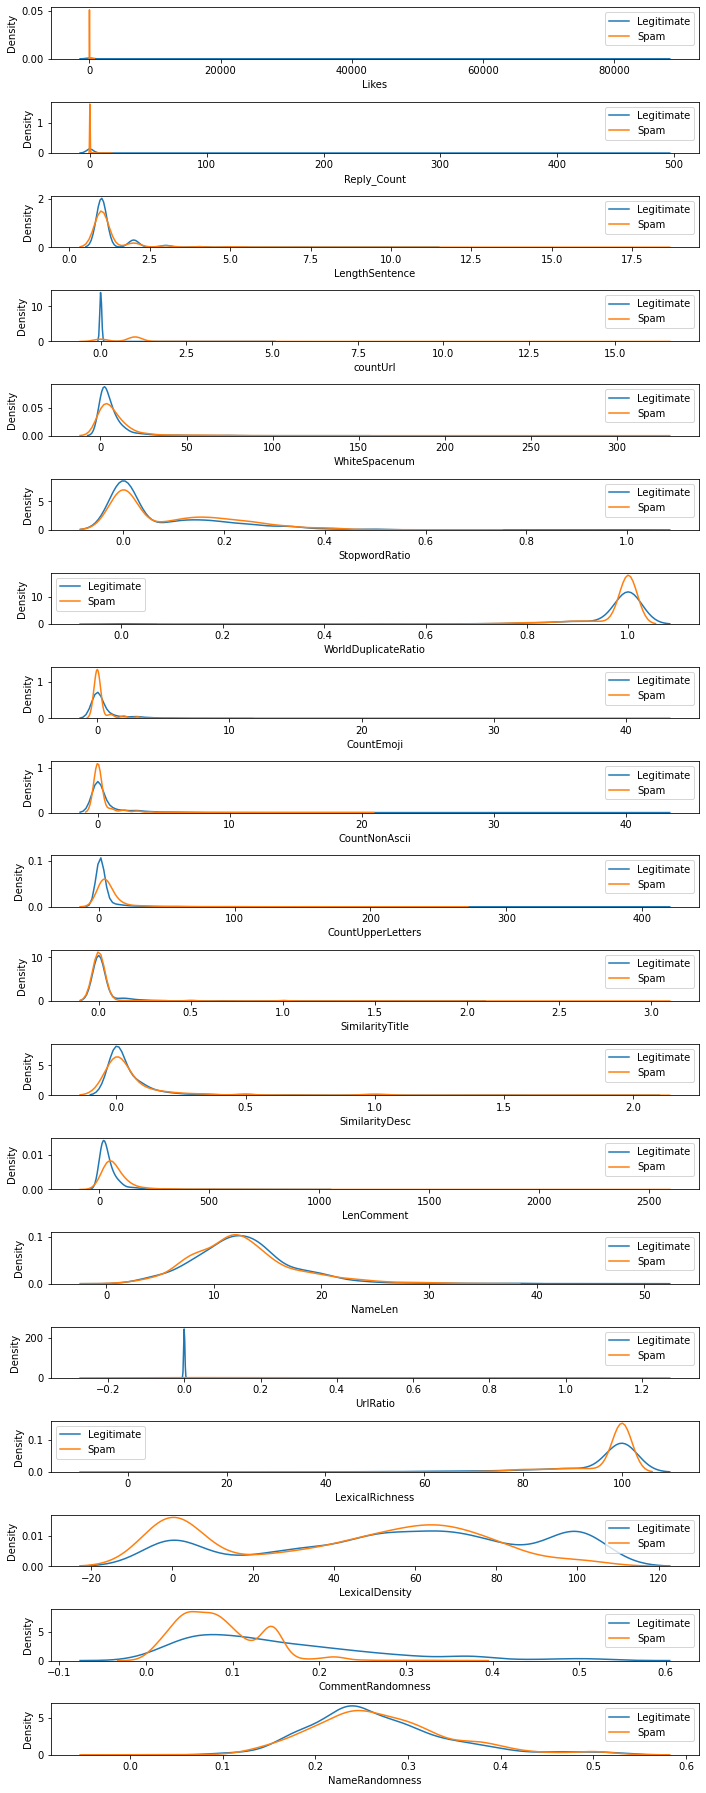

In [101]:
features = ["Likes", "Reply_Count", "LengthSentence", "countUrl", "WhiteSpacenum",
            "StopwordRatio", "WorldDuplicateRatio", "CountEmoji", "CountNonAscii",
            "CountUpperLetters", "SimilarityTitle", "SimilarityDesc","LenComment", "NameLen", "UrlRatio",
            "LexicalRichness", "LexicalDensity", "CommentRandomness",
            "NameRandomness"]

fig, axes = plt.subplots(len(features),1, figsize = (10,25))

for i in range(len(features)):
    sns.kdeplot(Legit[features[i]], ax = axes[i], label = "Legitimate")
    sns.kdeplot(spam[features[i]], ax = axes[i], label = "Spam")
    axes[i].set_xlabel(features[i])
    axes[i].legend()

plt.tight_layout()
plt.show()

Hasil dari subplot feature, pada hipotesis awal untuk count url dan url ratio merupakan feature yang diharapkan mampu membedakan antara spam comments dan legitimate comments. Akan tetapi, tidak terlalu memiliki pengaruh yang besar hal itu bisa dikarenakan user hanya mengisi komentar dengan link saja tidak dengan pernyataan atau kalimat-kalimat promosi terlebih dahulu.

In [ ]:
y = y.drop(columns=["Comment_Id"])

In [22]:
dfDummies = pd.get_dummies(y)

In [23]:
dfDummies

,Likes,Reply_Count,LengthSentence,CommentLength,countUrl,WhiteSpacenum,StopwordRatio,WorldDuplicateRatio,CountEmoji,CountNonAscii,...,SimilarityDesc,LenComment,NameLen,UrlRatio,LexicalRichness,LexicalDensity,CommentRandomness,NameRandomness,Label_legitimate,Label_spam
0,0,0,1,1,1,0,0.000000,1.0,0,0,...,0.000000,28,24,1.000000,100.0,100.000000,0.145843,0.147430,0,1
1,0,0,1,5,0,4,0.000000,1.0,0,0,...,0.000000,31,12,0.000000,100.0,40.000000,0.122352,0.257080,0,1
2,0,0,1,10,0,9,0.100000,1.0,0,0,...,0.000000,57,18,0.000000,100.0,50.000000,0.068595,0.200798,0,1
3,0,0,1,1,1,0,0.000000,1.0,0,0,...,0.000000,56,7,1.000000,100.0,0.000000,0.083523,0.319418,0,1
4,0,0,1,10,1,9,0.100000,1.0,0,0,...,0.000000,88,10,0.318182,100.0,70.000000,0.051711,0.312193,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,1,1,0,0,0.000000,1.0,0,0,...,0.000000,3,14,0.000000,100.0,100.000000,0.528321,0.241342,1,0
2996,0,0,1,6,0,5,0.166667,1.0,1,1,...,0.083333,31,9,0.000000,100.0,83.333333,0.119891,0.327523,1,0
2997,0,0,1,10,0,9,0.200000,1.0,0,0,...,0.125000,64,36,0.000000,100.0,60.000000,0.058311,0.116132,1,0
2998,0,0,1,2,0,1,0.000000,1.0,0,0,...,0.000000,13,16,0.000000,100.0,100.000000,0.221011,0.226562,1,0


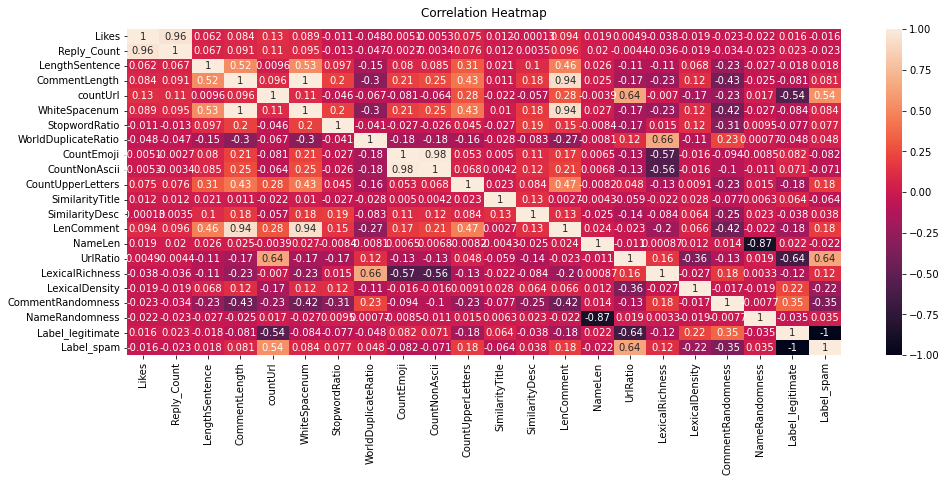

In [24]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dfDummies.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('..\Image\Heatmap Correlation.png', dpi=300, bbox_inches='tight')

In [111]:
features = ["Likes", "Reply_Count", "LengthSentence", "countUrl", "WhiteSpacenum",
            "StopwordRatio", "WorldDuplicateRatio", "CountEmoji", "CountNonAscii",
            "CountUpperLetters", "SimilarityTitle", "SimilarityDesc","LenComment", "NameLen", "UrlRatio",
            "LexicalRichness", "LexicalDensity", "CommentRandomness",
            "NameRandomness"]

def normalize(df, result):
    result = df.copy()
    for feature_name in features:
        max_value = result[feature_name].max()
        min_value = result[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [112]:
normData = normalize(clean, clean)

In [113]:
normData

,Video_Id,Tittle,Description,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,...,LengthSentence,countUrl,WhiteSpacenum,StopwordRatio,WorldDuplicateRatio,CountEmoji,CountNonAscii,CountUpperLetters,SimilarityTitle,SimilarityDesc
0,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Debat panas antara kedua pasangan calon presid...,Doharman Patimura Waruwu,https://youtu.be/LBKGyxnpMCU,Ugz-zdD0s87dSDzITuh4AaABAg,2019-01-17 23:06:24,0.0,0.0,spam,...,0.0,0.0625,0.000000,0.000000,1.0,0.00000,0.00000,0.017032,0.0,0.000000
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Akiru Syakir,Bantu subscribe youtube gw dong,UgwQM2OHIzkVDtu0PIN4AaABAg,2019-04-10 22:40:00,0.0,0.0,spam,...,0.0,0.0000,0.012539,0.000000,1.0,0.00000,0.00000,0.002433,0.0,0.000000
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Teguh Wage Prakoso,"hachimon tonkou, kalau buka gerbang ke 8 auto ...",Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,2019-04-09 02:50:06,0.0,0.0,spam,...,0.0,0.0000,0.028213,0.100000,1.0,0.00000,0.00000,0.000000,0.0,0.000000
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,hidayah,https://www.youtube.com/channel/UC_iQ1hcNxz1ir...,UgxA-h0VMWXoShPkFEZ4AaABAg,2019-04-10 12:25:49,0.0,0.0,spam,...,0.0,0.0625,0.000000,0.000000,1.0,0.00000,0.00000,0.017032,0.0,0.000000
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Derisma Ae,"https://youtu.be/aS1FIPcCuh4 CH: Derisma ae, m...",UgybtnYbYjDF7YZJAdN4AaABAg,2019-04-15 16:00:05,0.0,0.0,spam,...,0.0,0.0625,0.028213,0.100000,1.0,0.00000,0.00000,0.041363,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,agus muliandri,Top,UgxG_8lxSoZduOAiE-54AaABAg.8tXxFBA8lZa8tXzXBaY73i,2019-04-10 09:28:02,0.0,0.0,legitimate,...,0.0,0.0000,0.000000,0.000000,1.0,0.00000,0.00000,0.002433,0.0,0.000000
2842,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,EXE HUMAN,Creator senior memang beda ya 😎,Ugx4Ep3GEADS4c_w5YF4AaABAg,2019-04-09 11:43:58,0.0,0.0,legitimate,...,0.0,0.0000,0.015674,0.166667,1.0,0.02381,0.02381,0.002433,0.0,0.041667
2843,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Ni Luh Ayu Sibang Sri Padmayanti_056,Keunggulan dan kekurangan nge buat kita semua ...,UgzltfmrOp2dr3DbCPx4AaABAg,2019-04-11 13:48:07,0.0,0.0,legitimate,...,0.0,0.0000,0.028213,0.200000,1.0,0.00000,0.00000,0.002433,0.0,0.062500
2844,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,SkinnyIndonesian24 ( Andovi da Lopez sebagai J...,Brigita Deya 183,Keren parahhh,UgyaAGTI4x4ta4TE1cF4AaABAg,2019-04-09 10:20:06,0.0,0.0,legitimate,...,0.0,0.0000,0.003135,0.000000,1.0,0.00000,0.00000,0.002433,0.0,0.000000


In [114]:
normData.to_csv("../Data/Comments/NormDataCleaning.csv", index=False)